In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import copy
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [3]:
# Encode label into one-hot vectors
enc = OneHotEncoder()
y_train_onehot = enc.fit_transform(y_train).toarray()
y_test_onehot = enc.fit_transform(y_test).toarray()


In [4]:
def softmax(Z):
    '''
        Z: (NxC)
        return: A: (NxC)
    '''
    e_z = np.exp(Z)
    A = e_z/e_z.sum(axis=1).reshape(-1,1)
    return A
def loss(X, Y, W):
    '''
        X: Nxp
        Y: NxC
        W: pxC
        return: float
    '''
    A = softmax(X.dot(W))
    return -np.sum(Y * np.log(A))

In [5]:
def grad(X, Y, W):
    '''
        X: Nxp
        Y: NxC
        W: pxC
        return: pxC
    '''
    A = softmax(X.dot(W))    
    E = A-Y # NxC
    return X.T.dot(E)

In [6]:
class softmax_regression:
    def __init__(self, lr=1e-4, epochs=1000,fit_intercept=True,normalize=True):
        self.lr = lr
        self.epochs = epochs
        self.fit_inter = fit_intercept
        self.normalize = normalize
        
    def fit(self, X, Y):
        pass
        self.X = copy.deepcopy(X)
        self.Y = copy.deepcopy(Y)
        
        #Normalizaition
        if self.normalize==True:
            min=np.min(self.X,axis=0)
            max=np.max(self.X,axis=0)
            self.X=(self.X-min)/(max-min)
            self.X=(self.X-min)/(max-min)
        
        if self.fit_inter==True:
            self.X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
            
        self.W = np.random.randn(self.X.shape[1], self.Y.shape[1])
        self.BGD()
    def BGD(self):
        pass
        self.list_W = []
        self.hist = []
        for i in range(self.epochs):
            self.W = self.W - self.lr * grad(self.X, self.Y, self.W)
            cost = loss(self.X, self.Y, self.W)
            print(f'Loss at {i}th epoch {cost}')
            self.list_W.append(self.W)
            self.hist.append(cost)
            
    def predict(self, X):
        if self.fit_inter == True:
            X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
        return np.argmax(softmax(X.dot(self.list_W[-1])),axis=1)
    
    def predict_proba(self, X):
        if self.fit_inter == True:
            X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
        return softmax(X.dot(self.list_W[-1]))
    
    def score(self, X, y):
        if self.fit_inter == True:
            X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
        pred = np.argmax(softmax(X.dot(self.list_W[-1])),axis=1)
        return np.mean(pred == np.argmax(y,axis=1))
    
    def history(self, ax):
        '''
            Plot a visualization for the loss function
        '''
        pass
        ax.plot(self.hist)

In [7]:
model = softmax_regression(lr=0.01,epochs=1000,fit_intercept=True,normalize=True)
model.fit(X_train, y_train_onehot)
print(model.list_W[-1])

Loss at 0th epoch 1982.924289104068
Loss at 1th epoch 2308.784149021005
Loss at 2th epoch 1318.8279334070007
Loss at 3th epoch 2335.0407699528205
Loss at 4th epoch 730.0701272287138
Loss at 5th epoch 876.2978588855833
Loss at 6th epoch 962.5494251970031
Loss at 7th epoch 602.6163718750636
Loss at 8th epoch 1157.6498983659608
Loss at 9th epoch 382.17027417018517
Loss at 10th epoch 1259.261313106582
Loss at 11th epoch 511.70106192099365
Loss at 12th epoch 864.8833989717494
Loss at 13th epoch 950.9988676890531
Loss at 14th epoch 1154.7370774892993
Loss at 15th epoch 538.6065915720069
Loss at 16th epoch 1000.864630489706
Loss at 17th epoch 1912.146084320056
Loss at 18th epoch 621.837315341306
Loss at 19th epoch 1381.174369734455
Loss at 20th epoch 40.95083279864207
Loss at 21th epoch 831.6691525946046
Loss at 22th epoch 638.3510382761742
Loss at 23th epoch 1057.8967534267676
Loss at 24th epoch 361.34491009432696
Loss at 25th epoch 1282.6610904776908
Loss at 26th epoch 91.47622467150785
Los

Loss at 782th epoch 8.952344190534125
Loss at 783th epoch 8.871782815240023
Loss at 784th epoch 8.944581025815461
Loss at 785th epoch 8.86427863095117
Loss at 786th epoch 8.936843217474747
Loss at 787th epoch 8.856798204590474
Loss at 788th epoch 8.929130643221335
Loss at 789th epoch 8.84934142344645
Loss at 790th epoch 8.921443181605557
Loss at 791th epoch 8.841908175552387
Loss at 792th epoch 8.913780712014916
Loss at 793th epoch 8.834498349683768
Loss at 794th epoch 8.906143114670305
Loss at 795th epoch 8.827111835355792
Loss at 796th epoch 8.898530270622054
Loss at 797th epoch 8.819748522820614
Loss at 798th epoch 8.89094206174611
Loss at 799th epoch 8.812408303064576
Loss at 800th epoch 8.883378370739898
Loss at 801th epoch 8.805091067805483
Loss at 802th epoch 8.875839081118539
Loss at 803th epoch 8.797796709489635
Loss at 804th epoch 8.868324077210458
Loss at 805th epoch 8.790525121288802
Loss at 806th epoch 8.860833244153591
Loss at 807th epoch 8.783276197097395
Loss at 808th e

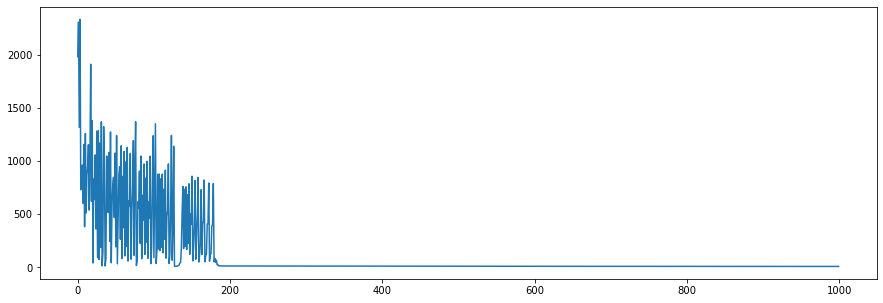

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
model.history(ax)
plt.show()

In [9]:
model.score(X_test, y_test_onehot)

0.92

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e5, 
        solver = 'lbfgs', multi_class = 'multinomial').fit(X_train, y_train)
clf.score(X_test,y_test)

0.98